In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

def random_frame_plotter(images, rows=5, cols=5):
    np.random.seed(42)
    indices = np.random.choice(images.shape[0], size=rows*cols, replace=False)
    fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
    
    for ax, idx in zip(axes.flat, indices):
        im = ax.imshow(images[idx])
        ax.axis('off') 
        ax.set_title(f"Frame {idx}", fontsize=8)
        fig.colorbar(im, ax=ax)
    plt.show()

def vmax_random_frame_plotter(images, rows=5, cols=5):
    np.random.seed(42)
    indices = np.random.choice(images.shape[0], size=rows*cols, replace=False)
    fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
    
    for ax, idx in zip(axes.flat, indices):
        im = ax.imshow(images[idx], vmin=0, vmax=30)
        ax.axis('off') 
        ax.set_title(f"Frame {idx}", fontsize=8)
        fig.colorbar(im, ax=ax)
    plt.show()

def aqi_random_frame_plotter(images, rows=5, cols=5):
    #https://metone.com/how-to-calculate-aqi-and-nowcast-indices
    aqi_colors = [
        "#00e400",  # Good
        "#ffff00",  # Moderate
        "#ff7e00",  # Unhealthy for Sensitive Groups
        "#ff0000",  # Unhealthy
        "#8f3f97",  # Very Unhealthy
        "#7e0023",  # Hazardous
    ]

    # Define AQI breakpoints
    aqi_bounds = [0, 12.1, 35.5, 55.5, 150.5, 250.5, 350.5]
    
    # Create colormap and norm
    cmap = ListedColormap(aqi_colors)
    norm = BoundaryNorm(aqi_bounds, cmap.N)
    
    np.random.seed(42)
    indices = np.random.choice(images.shape[0], size=rows*cols, replace=False)
    fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
    
    for ax, idx in zip(axes.flat, indices):
        im = ax.imshow(images[idx], cmap=cmap, norm=norm)
        ax.axis('off') 
        ax.set_title(f"Frame {idx}", fontsize=8)
        fig.colorbar(im, ax=ax)
    plt.show()


def straight_frame_plotter(images, idx, rows=2, cols=5):
    '''
    plots the 5 frames surrounding the image
    '''
    indices = range(idx-5, idx+5)
    fig, axes = plt.subplots(rows, cols, figsize=(14, 5))
    
    for ax, idx in zip(axes.flat, indices):
        im = ax.imshow(images[idx], vmin=0, vmax=30)
        ax.axis('off') 
        ax.set_title(f"Frame {idx}", fontsize=8)
        fig.colorbar(im, ax=ax, shrink=0.8)
    plt.show()

In [2]:
#openaq = np.load('/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/openaq_cache/openaq_processed.npz')['data']
openaq = np.load('/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/openaq_cache/trimmed/openaq_processed.npz')['data']
#openaq = np.load('/home/mgraca/Workspace/hrrr-smoke-viz/tests/openaqdata/data/openaq_processed.npz')['data']
openaq.shape

(168, 40, 40)

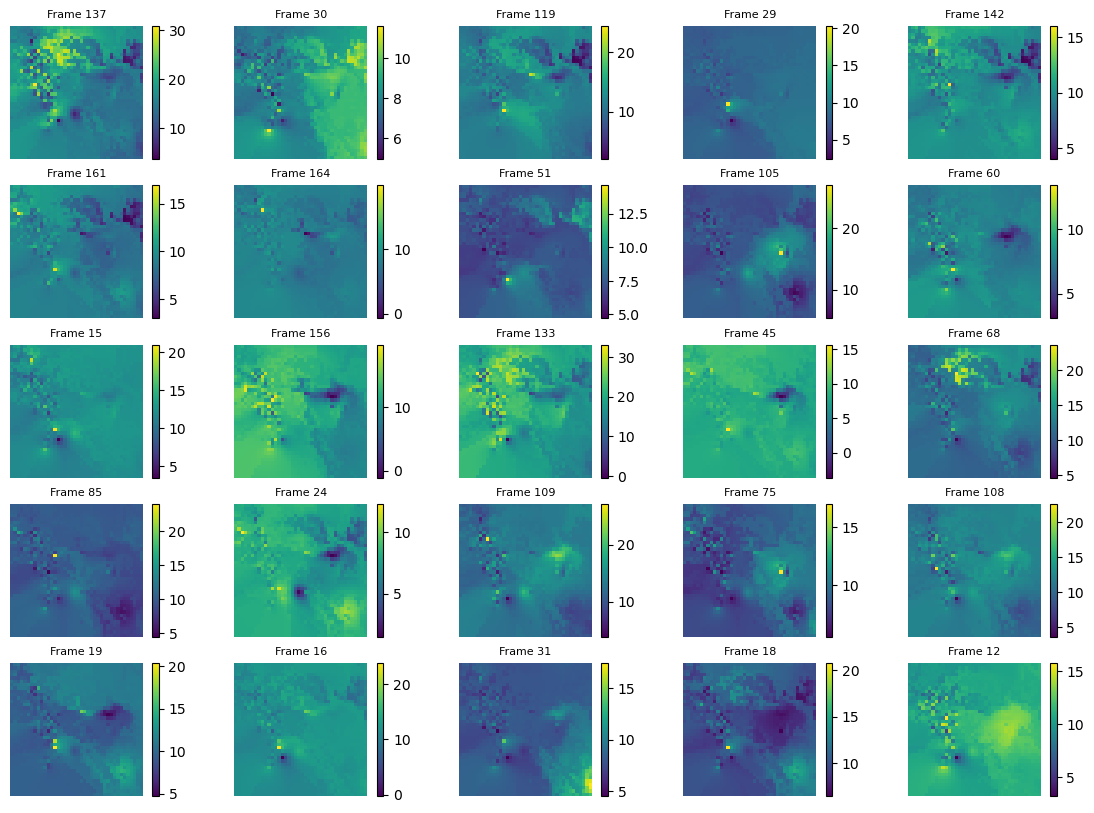

In [3]:
random_frame_plotter(openaq)

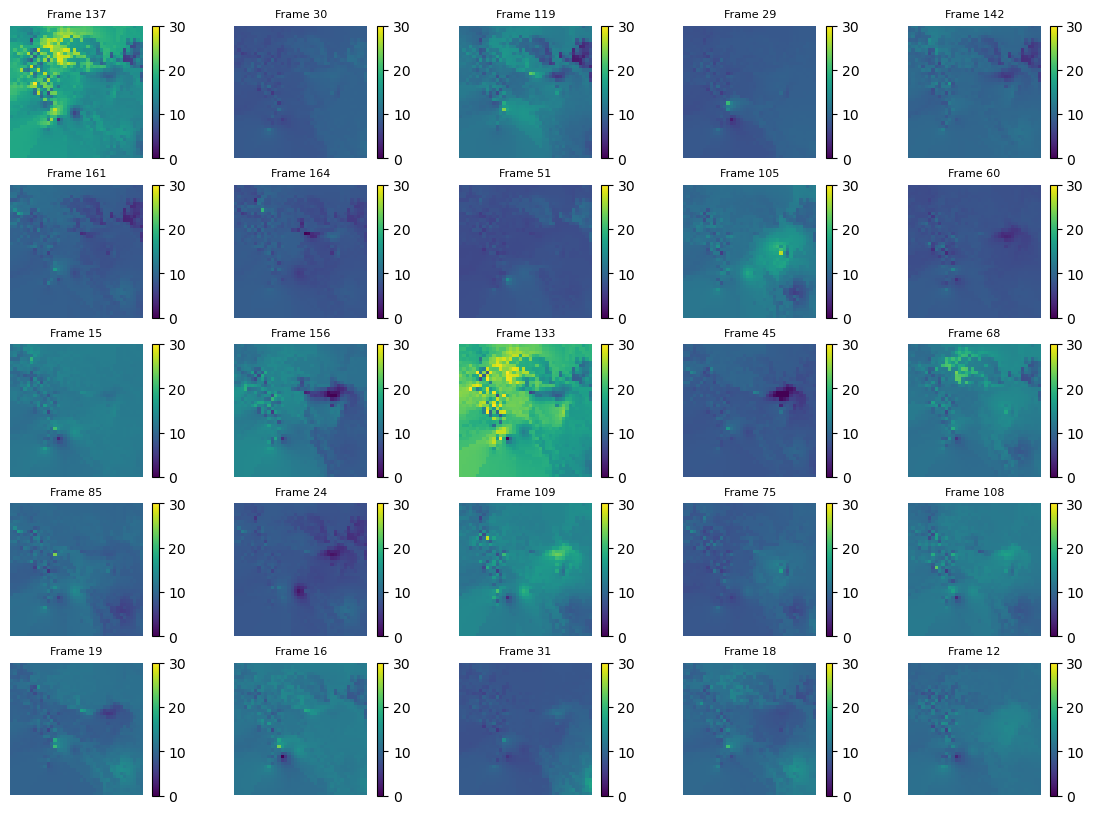

In [4]:
vmax_random_frame_plotter(openaq)

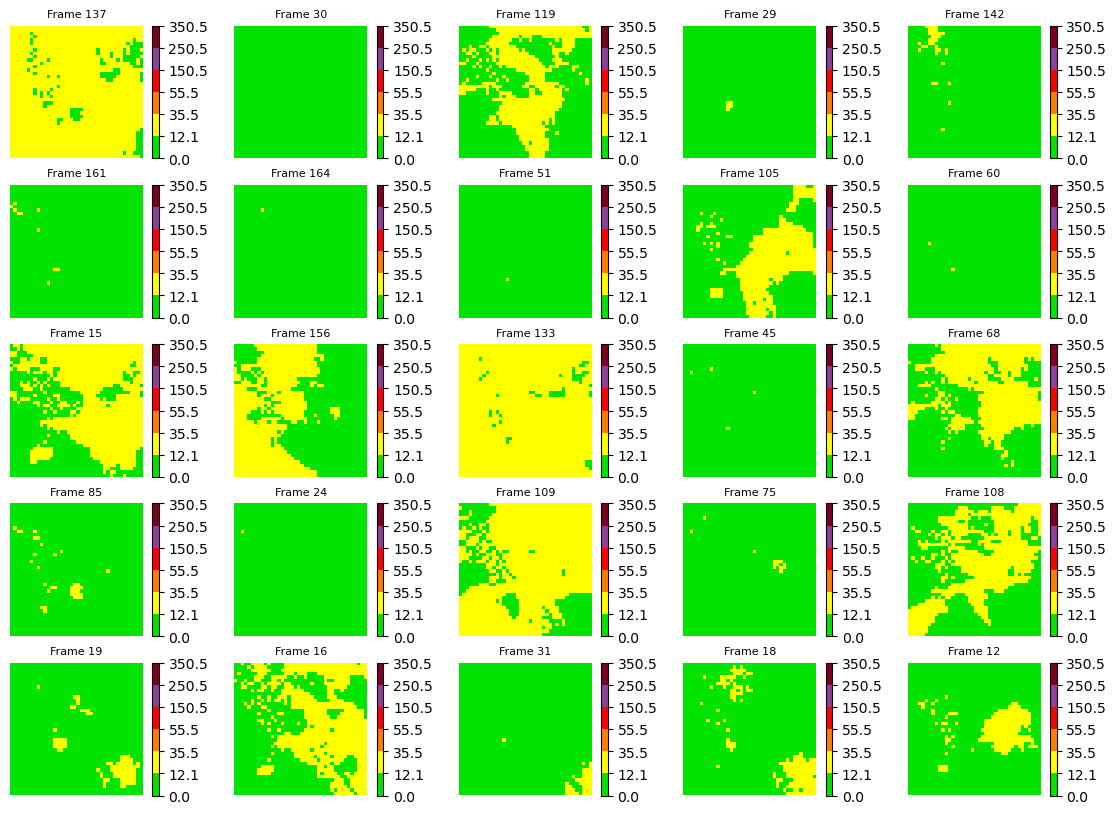

In [5]:
aqi_random_frame_plotter(openaq)

In [6]:
#straight_frame_plotter(openaq, 10000)